# FT_SOMMELIER

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
red_wine_df = pd.read_csv("/nfs/2018/t/tholzheu/42_program/ft_sommelier/resources/winequality-red.csv", sep=';')
white_wine_df = pd.read_csv("/nfs/2018/t/tholzheu/42_program/ft_sommelier/resources/winequality-white.csv", sep=';')

# my computer

#red_wine_df = pd.read_csv("/home/thomas/42/github/ft_sommelier/resources/winequality-red.csv", sep=';')
#white_wine_df = pd.read_csv("/home/thomas/42/github/ft_sommelier/resources/winequality-white.csv", sep=';')

In [16]:
print(len(red_wine_df))
red_wine_df.head()

1599


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### V.1 Exploring the green reds

#### a) Plot scatter matrix function

In [5]:
def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False, name=''):
    fig, axmat = plt.subplots(12, 12, figsize=(20, 20))
    for axrow in axmat:
        for ax in axrow:
            ax.set_xticks([])
            ax.set_yticks([])
    plt.subplots_adjust(wspace=0, hspace=0)
    h_list = red_wine_df.columns.values
    for i in range(len(h_list)):
        for j in range(len(h_list)):
            plt.sca(axmat[i][j])
            if (i == j):
                plt.text(0.5, 0.5, h_list[j].replace(' ', '\n'), fontsize=16, ha='center', va='center')
            else:
                plt.scatter(red_wine_df[h_list[j]][red_wine_df['quality'] > good_threshold],
                            red_wine_df[h_list[i]][red_wine_df['quality'] > good_threshold], s=3, c='g')
                plt.scatter(red_wine_df[h_list[j]][red_wine_df['quality'] < bad_threshold],
                            red_wine_df[h_list[i]][red_wine_df['quality'] < bad_threshold], s=3, c='m')
    if (save_plot):
        plt.savefig(name + 'plt.png') # bbox_inches='tight' to remove white space around
    plt.show()

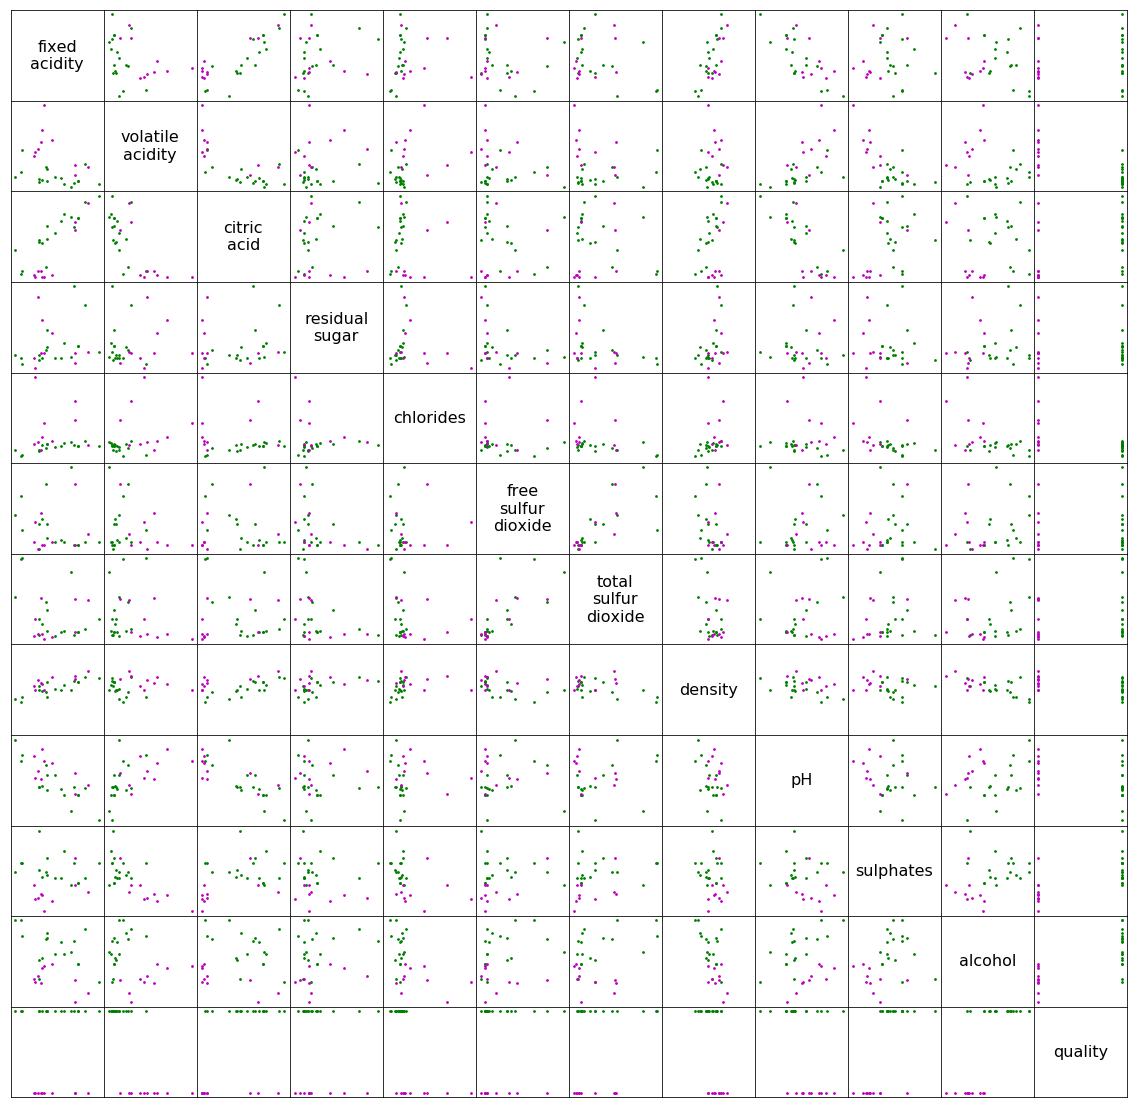

In [9]:
plot_scatter_matrix(red_wine_df, 7, 4)

#### b) Which factors do you think will be most useful for distinguishing high vs low quality wines

At a first glance I see that sulphates and alcohol have a clearer division when it comes to quality.
We can see in the figure that in most cases a higher alcohol quantity and a higher level of sulphates results
in a beter quality wine. This is the case when comparing high quality wines (8 or higher) vs low quality wines
(3 or lower)

### V.2 Learning to perceptron

#### a) & b) Perceptron implementation and training

In [8]:
def heaviside_step_fn(nb):
    if (nb < 0):
        return (0)
    elif (nb >= 0):
        return (1)

def select_features(df):
    features = red_wine_df[['pH', 'density']][(red_wine_df['quality'] >= 8) | (red_wine_df['quality'] <=3)]
    features = [list(a[item]) for item in a]
    return (features) # returns a list of lists containing the values of each feature

